<a href="https://colab.research.google.com/github/schilloji/ml_fractal_3_assignment/blob/build/problem_3_task_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from IPython.display import display
import matplotlib.pyplot as plt
import os
import shutil
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def dataLoader(data_path):
  # set the image size for resizing
  img_size = (28, 28)

  # create empty arrays for the images and labels
  images = []
  labels=[]
  label_path = '/content/drive/MyDrive/charts/'
  lbl_df=pd.read_csv(label_path+str('train_val.csv'))
  
  # loop through each image in the folder
  for file in os.listdir(data_path):
    indx=int(file.split('.')[0])
    file_path = os.path.join(data_path, file)
    # open the image using cv2
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize the image to (224, 224)
    
    # add the image and label to the respective arrays
    images.append(img)
    labels.append(lbl_df.iloc[indx,:][1])
        
  # convert the images and labels to NumPy arrays
  images = np.array(images)
  labels = np.array(labels)
  
  # Encode the labels as one-hot vectors
  label_encoder = LabelEncoder()
  y = label_encoder.fit_transform(labels)
  onehot_encoder = OneHotEncoder(sparse=False)
  labels = onehot_encoder.fit_transform(y.reshape(-1, 1))

  # print the shapes of the arrays
  print('Images shape:', images.shape)
  print('labels shape:', labels.shape)

  return images,labels

In [4]:
data_path = '/content/drive/MyDrive/charts/train_val/'
train_images,train_labels=dataLoader(data_path)

Images shape: (1000, 224, 224, 3)
labels shape: (1000, 5)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [6]:
# Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
25/25 [==============================] - 14s 64ms/step - loss: 1522.1060 - accuracy: 0.4812 - val_loss: 2.5356 - val_accuracy: 0.8250
Epoch 2/10
25/25 [==============================] - 1s 43ms/step - loss: 0.7841 - accuracy: 0.9137 - val_loss: 1.4584 - val_accuracy: 0.8050
Epoch 3/10
25/25 [==============================] - 1s 40ms/step - loss: 0.5908 - accuracy: 0.9100 - val_loss: 0.9183 - val_accuracy: 0.8850
Epoch 4/10
25/25 [==============================] - 1s 38ms/step - loss: 0.2062 - accuracy: 0.9750 - val_loss: 0.6640 - val_accuracy: 0.9300
Epoch 5/10
25/25 [==============================] - 1s 41ms/step - loss: 2.1018 - accuracy: 0.9438 - val_loss: 1.5679 - val_accuracy: 0.8650
Epoch 6/10
25/25 [==============================] - 1s 41ms/step - loss: 0.1080 - accuracy: 0.9800 - val_loss: 1.3384 - val_accuracy: 0.9000
Epoch 7/10
25/25 [==============================] - 1s 38ms/step - loss: 0.0740 - accuracy: 0.9925 - val_loss: 1.0343 - val_accuracy: 0.9400
Epoch 8/1

In [19]:
# Define model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

# Train model
history=model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

# Evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
25/25 [==============================] - 2s 47ms/step - loss: 1172.9683 - accuracy: 0.5025 - val_loss: 8.0555 - val_accuracy: 0.6900
Epoch 2/100
25/25 [==============================] - 1s 38ms/step - loss: 2.3865 - accuracy: 0.8025 - val_loss: 1.9673 - val_accuracy: 0.8250
Epoch 3/100
25/25 [==============================] - 1s 41ms/step - loss: 0.6279 - accuracy: 0.8988 - val_loss: 2.3657 - val_accuracy: 0.8100
Epoch 4/100
25/25 [==============================] - 1s 38ms/step - loss: 0.1587 - accuracy: 0.9688 - val_loss: 1.4662 - val_accuracy: 0.9200
Epoch 5/100
25/25 [==============================] - 1s 38ms/step - loss: 0.0428 - accuracy: 0.9925 - val_loss: 1.7230 - val_accuracy: 0.9250
Epoch 6/100
25/25 [==============================] - 1s 41ms/step - loss: 0.0246 - accuracy: 0.9937 - val_loss: 1.8804 - val_accuracy: 0.9400
Epoch 7/100
25/25 [==============================] - 1s 43ms/step - loss: 0.0129 - accuracy: 0.9975 - val_loss: 1.4946 - val_accuracy: 0.9400
Epo

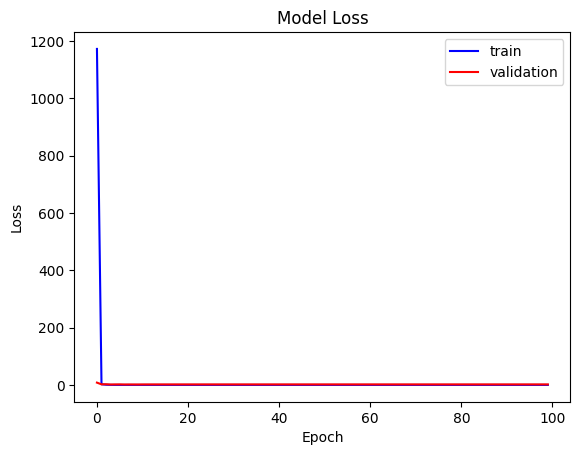

In [20]:
# plot the train and validation loss
plt.plot(history.history['loss'],color='blue', label='train')
plt.plot(history.history['val_loss'],color='red', label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

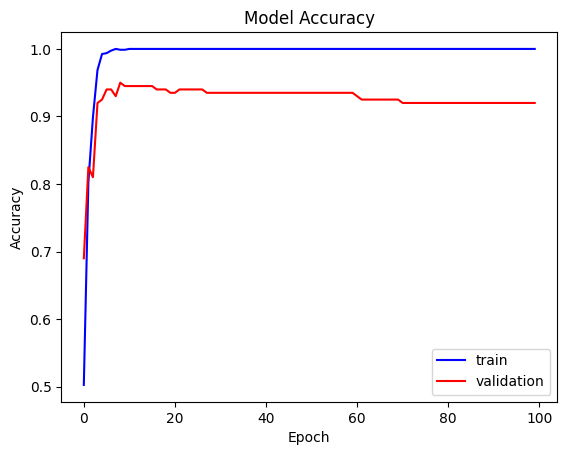

In [22]:
# plot the train and validation loss
plt.plot(history.history['accuracy'],color='blue', label='train')
plt.plot(history.history['val_accuracy'],color='red', label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [18]:

pretain_path='/content/drive/MyDrive/charts/alexnet/'
label_path = '/content/drive/MyDrive/charts/'
lbl_df=pd.read_csv(label_path+str('train_val.csv'))

try:
  os.mkdir(label_path+str('alexnet'))
  for i in lbl_df['type'].unique():  
    class_path=pretain_path+str(i)
    if os.path.exists(class_path):
      pass
    else:
      os.mkdir(class_path)
except OSError as e:
  print(f"No need to create {e}")


No need to create [Errno 17] File exists: '/content/drive/MyDrive/charts/alexnet'


In [19]:
image_path = '/content/drive/MyDrive/charts/train_val'

for file in os.listdir(image_path):
  indx=int(file.split('.')[0])
  file_path = os.path.join(image_path, file)
  class_=lbl_df.iloc[indx,:][1]
  target_path=os.path.join(pretain_path,class_)
  if os.path.exists(os.path.join(pretain_path,class_,file)):
    pass
  else:
    if class_=='dot_line':
      shutil.copy(file_path, target_path)
    if class_=='pie':
      shutil.copy(file_path, target_path)
    if class_=='hbar_categorical':
      shutil.copy(file_path, target_path)
    if class_=='line':
      shutil.copy(file_path, target_path)
    if class_=='vbar_categorical':
      shutil.copy(file_path, target_path)


In [20]:
# Define transforms for the training and validation sets
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(size=224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [21]:
pretain_path='/content/drive/MyDrive/charts/alexnet/'
train_dataset = ImageFolder(root=pretain_path, transform=train_transforms)

In [22]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [45]:
model = models.alexnet(pretrained=True)
#model=model.cuda()
model.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
num_classes = 5
model.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [47]:
model=model.to(device)

In [37]:
# for param in model.parameters():
#     param.requires_grad = False

# model.classifier[-1].requires_grad = True

In [48]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [49]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.cuda()
        labels = labels.cuda()
        # print(inputs)
        # print(labels)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))


Epoch [1/10], Loss: 1.4262
Epoch [2/10], Loss: 0.3932
Epoch [3/10], Loss: 0.3996
Epoch [4/10], Loss: 0.2316
Epoch [5/10], Loss: 0.1371
Epoch [6/10], Loss: 0.1940
Epoch [7/10], Loss: 0.2778
Epoch [8/10], Loss: 0.5985
Epoch [9/10], Loss: 0.4510
Epoch [10/10], Loss: 0.3602


In [50]:
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy on the validation set: {:.2f}%'.format(correct / total * 100))

Accuracy on the validation set: 94.60%
